In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
from cnn_model import build_model, train_model, save_cnn_model, load_cnn_model
from models.cnn_v2.cnn_normalize import get_cnn_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data, plot_direction_comparison
from constants import SP500_TICKER
# import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 5, 16)               │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 5, 16)               │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

---

## For **train_model** function

In [4]:
train, test, predict= get_cnn_data(SP500_TICKER)

x_train = train["x"] 
y_train = train["y"]

x_test = test["x"]
y_test = test["y"]

x_predict = predict["x"]
y_predict = predict["y"]


print("Train data:")
print(x_train[0])
print(x_train.shape)
print(y_train[0])
print(y_train.shape)

print("Test data:")
print(y_test[0])
print(x_test.shape)
print(x_test[0])
print(x_test.shape)

print("Predict data:")
print(x_predict[0])
print(x_predict.shape)
print(y_predict[0])
print(y_predict.shape)

Train data:
[0.16056357 0.41950307 0.68446702 0.66107694 0.        ]
(4806, 5)
1.0
(4806,)
Test data:
0.0
(601, 5)
[0.53091919 0.58016463 0.77422964 0.78522185 1.        ]
(601, 5)
Predict data:
[0.897763   0.43528148 0.72397474 0.75499867 0.        ]
(601, 5)
0.0
(601,)


In [5]:
# plt = config_chart('Model Data')
# plt.plot(y_dates_train[:, 0], y_train[:, 0])
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.legend(['Train', 'Test','Predict'])

Epoch 1/100


151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4631 - loss: 0.4526 - mean_absolute_error: 0.5565
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4806 - loss: 0.2537 - mean_absolute_error: 0.5009
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5389 - loss: 0.2488 - mean_absolute_error: 0.4957
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5539 - loss: 0.2476 - mean_absolute_error: 0.4927
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5241 - loss: 0.2491 - mean_absolute_error: 0.4977
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5338 - loss: 0.2491 - mean_absolute_error: 0.4977
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5277 - loss: 0.2496 - mean_absolute_error: 0.4970
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5333 - loss: 0.2487 - mean_absolute_error: 0.4965
Epoch 9/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5234 - lo

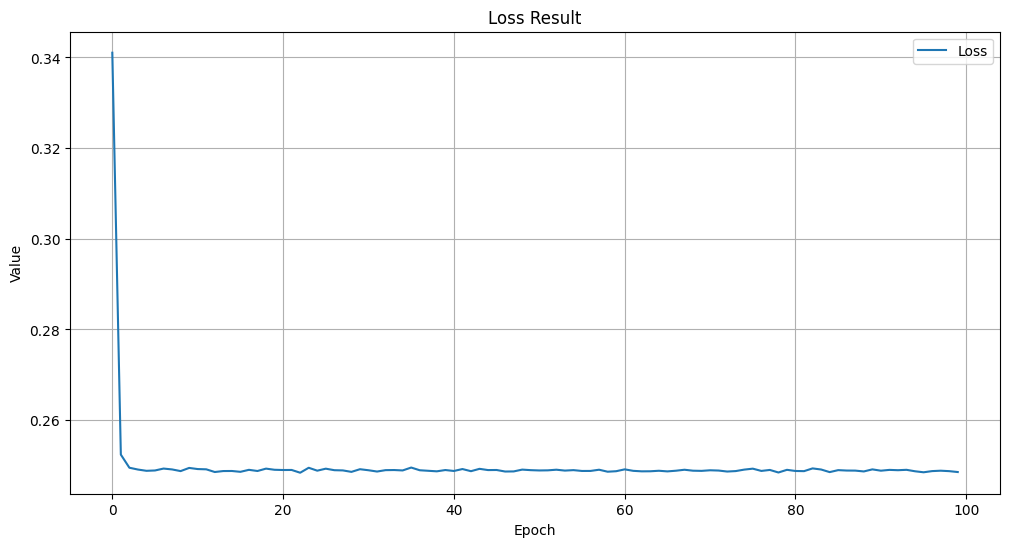

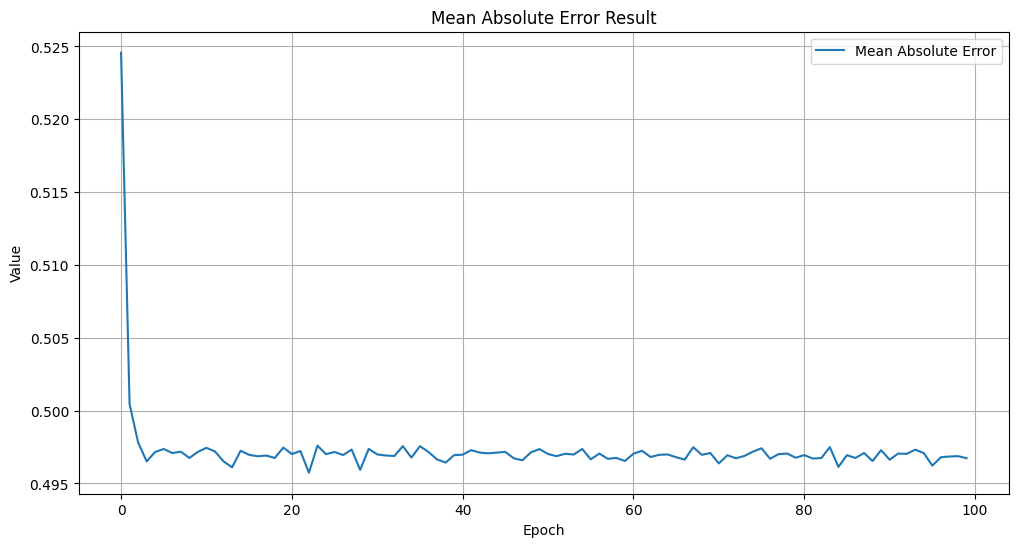

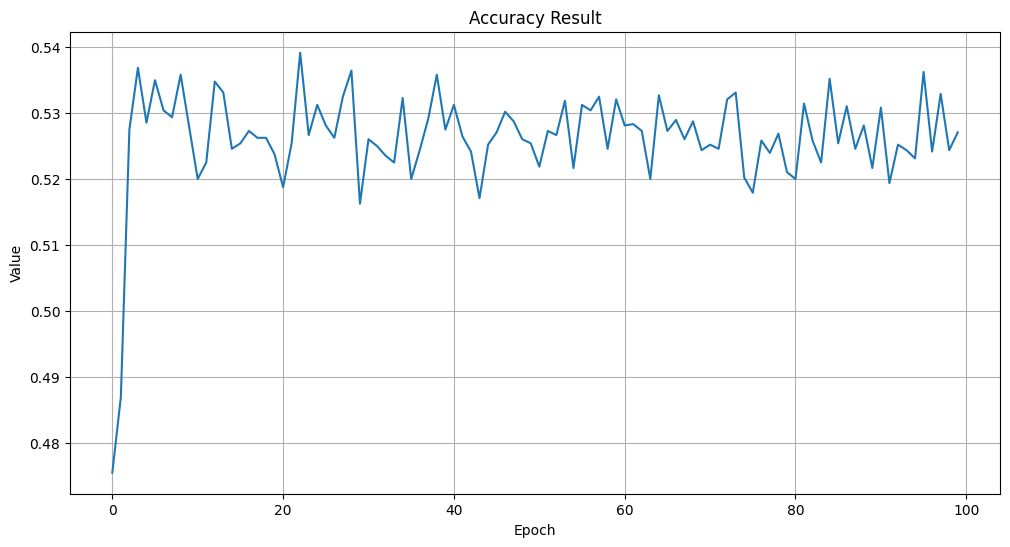

Train result:
Test result:
[0.24681055545806885, 0.5657237768173218, 0.4953398108482361]


In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test) 

plot_model_performance(fit_result)
# plot_model_performance(evaluate_result)

print("Train result:")
print(fit_result)

print("Test result:")
print(evaluate_result)

save_cnn_model(model)

In [7]:
latest_train_metrics = [value[-1] for key, value in fit_result.history.items()]

print("Train result:")
print("accuracy, loss, precision, recall")
print(latest_train_metrics)

print("Test result:")
print("loss, accuracy, precision, recall")
print(evaluate_result)

Train result:
accuracy, loss, precision, recall
[0.5270495414733887, 0.24854154884815216, 0.4967338740825653]
Test result:
loss, accuracy, precision, recall
[0.24681055545806885, 0.5657237768173218, 0.4953398108482361]


In [8]:
model = load_cnn_model()

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


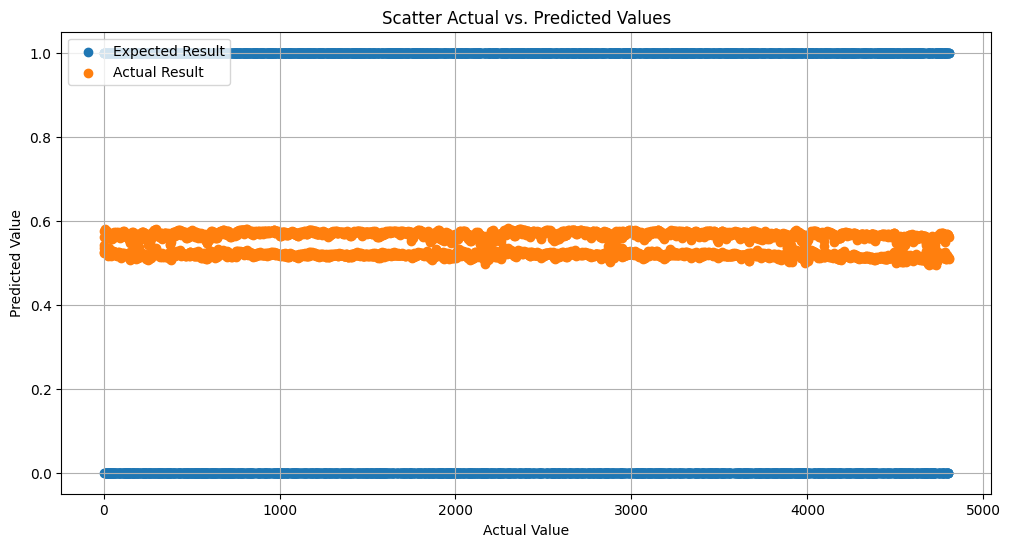

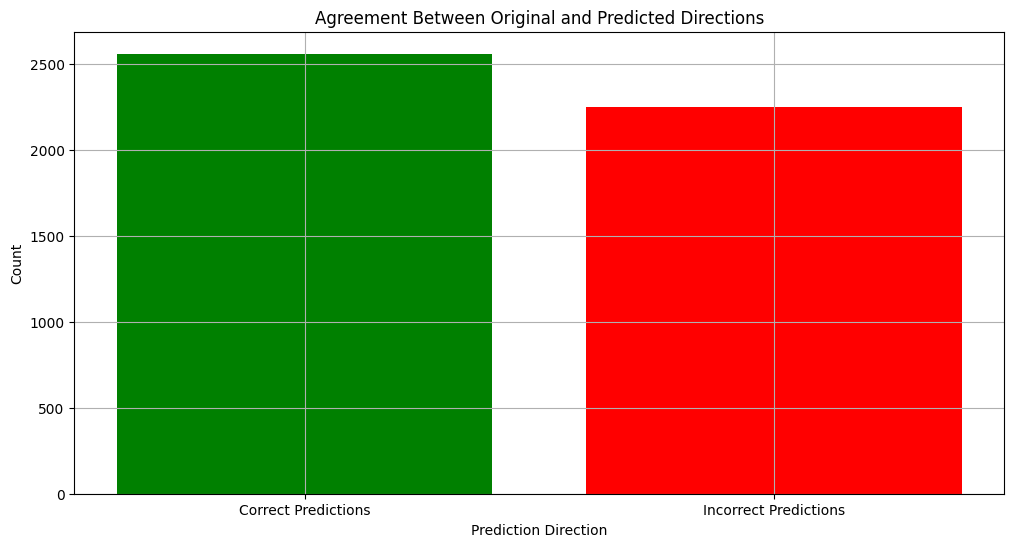

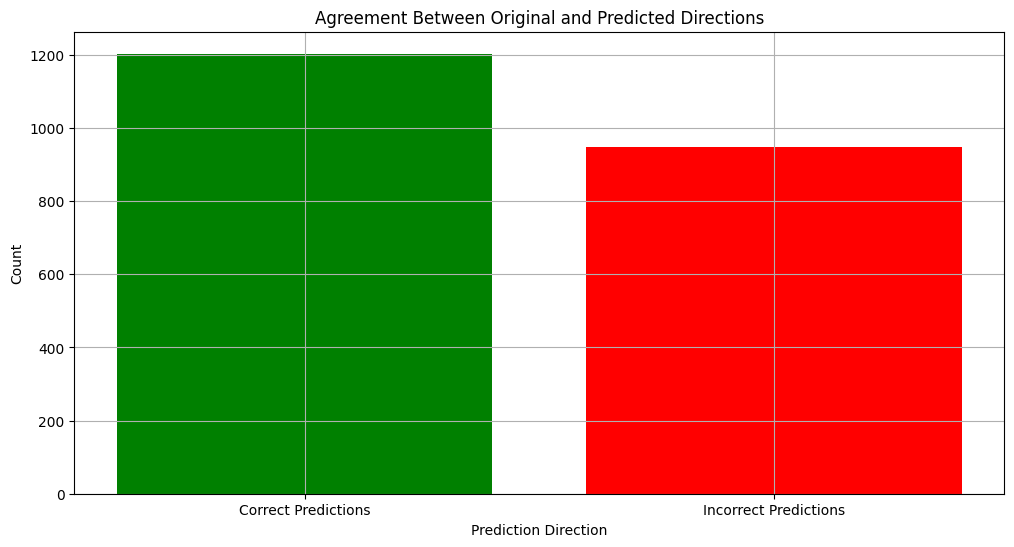

In [9]:
predictions_train = model.predict(x_train)

plot_scatter_data(y_train, predictions_train)
plot_direction_comparison(y_train, predictions_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


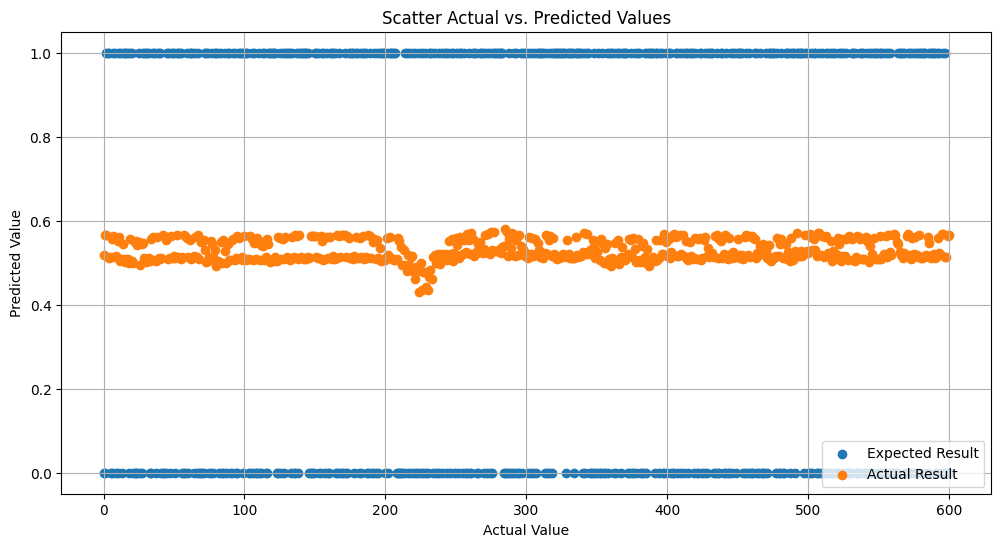

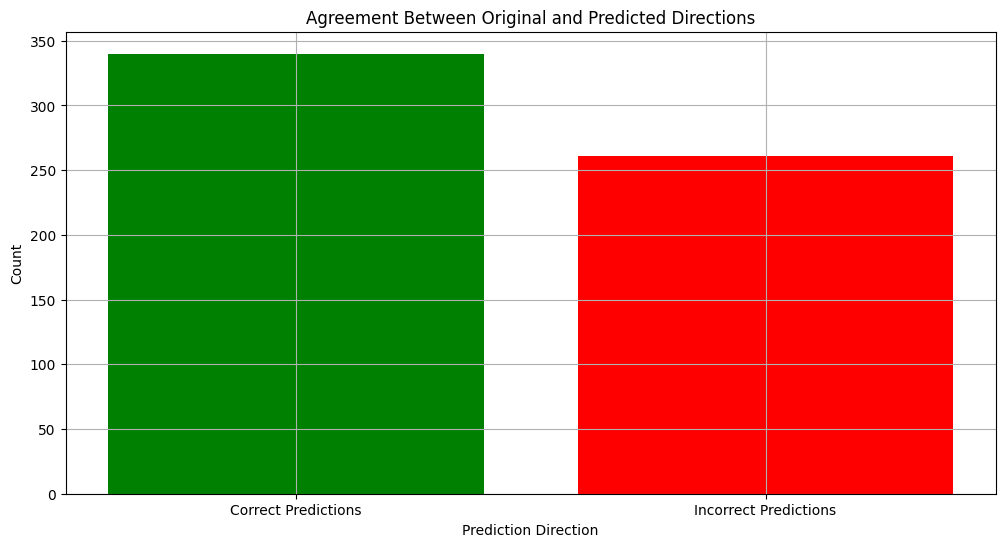

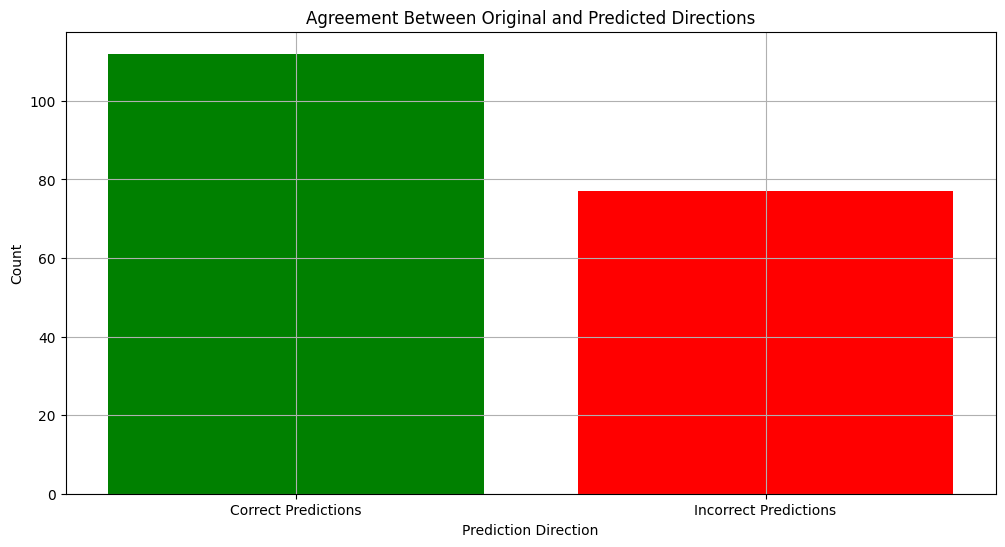

In [10]:
predictions_test = model.predict(x_test)

plot_scatter_data(y_test, predictions_test)
plot_direction_comparison(y_test, predictions_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


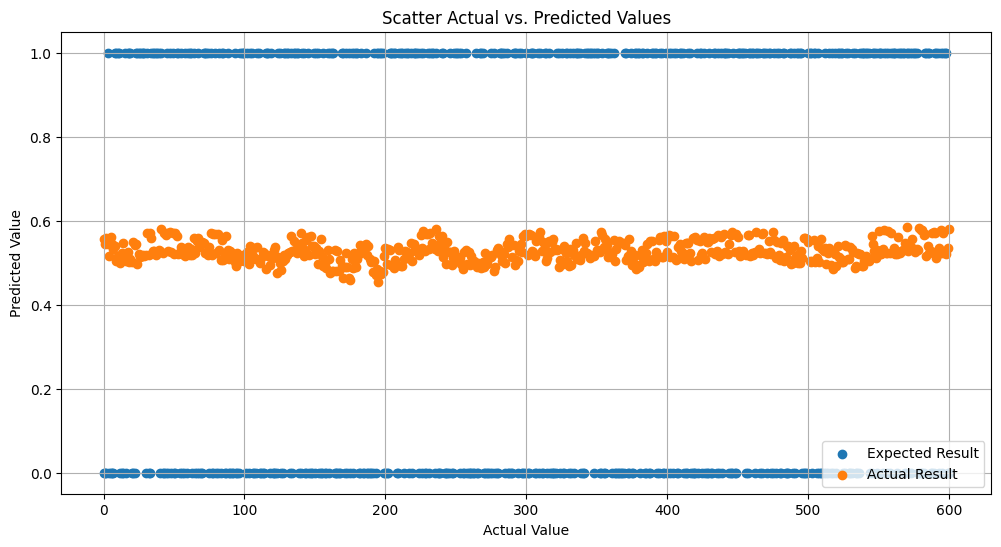

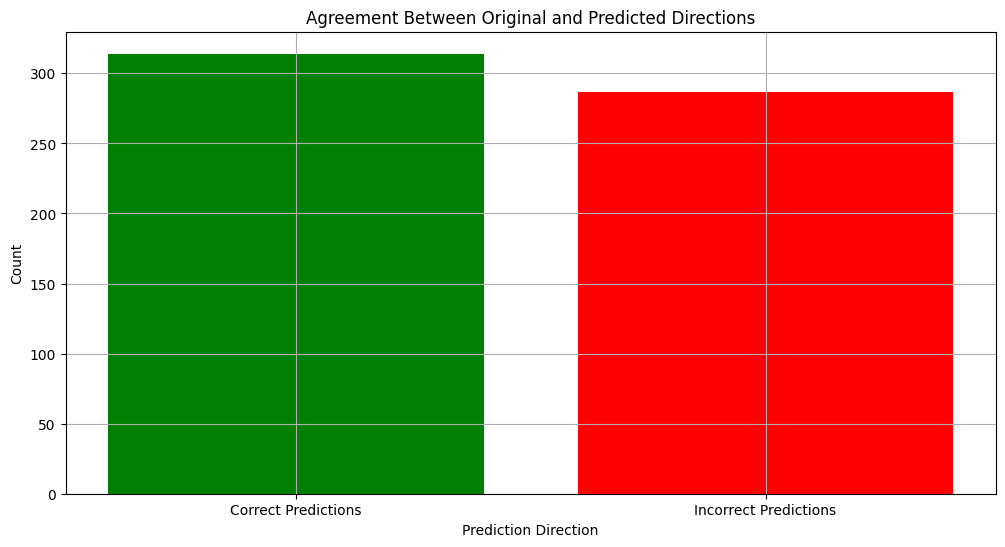

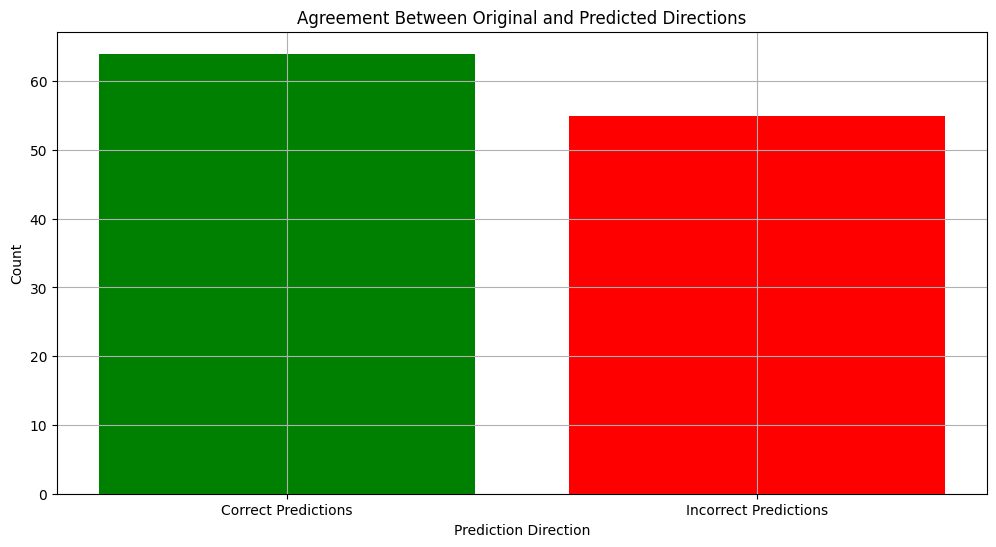

In [11]:
predictions = model.predict(x_predict)

predictions = predictions

plot_scatter_data(y_predict, predictions)
plot_direction_comparison(y_predict, predictions)